In [ ]:
import pandas as pd
df = pd.read_csv('/content/Restaurant_Reviews.csv')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


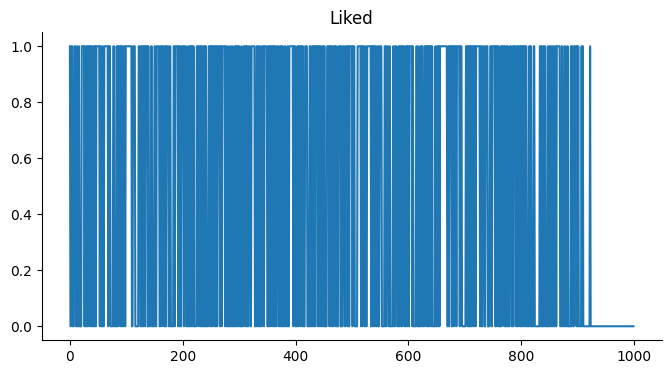

In [ ]:
from matplotlib import pyplot as plt
df['Liked'].plot(kind='line', figsize=(8, 4), title='Liked')
plt.gca().spines[['top', 'right']].set_visible(False)

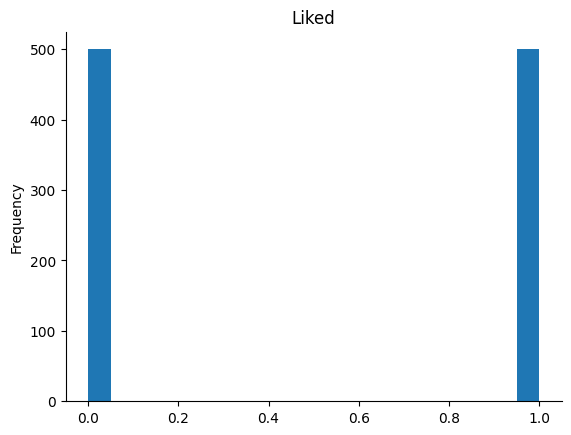

In [ ]:
from matplotlib import pyplot as plt
df['Liked'].plot(kind='hist', bins=20, title='Liked')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df.size

2000

In [ ]:
df.shape

(1000, 2)

In [ ]:
df.Liked

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [ ]:
#input and output
x=df.iloc[:,0].values
y=df.iloc[:,1].values

In [ ]:
print(x)
print(y)

['Wow... Loved this place.' 'Crust is not good.'
 'Not tasty and the texture was just nasty.'
 'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.'
 'The selection on the menu was great and so were the prices.'
 'Now I am getting angry and I want my damn pho.'
 "Honeslty it didn't taste THAT fresh.)"
 'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.'
 'The fries were great too.' 'A great touch.' 'Service was very prompt.'
 'Would not go back.'
 'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.'
 'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!'
 'I was disgusted because I was pretty sure that was human hair.'
 'I was shocked because no signs indicate cash only.'
 'Highly recommended.' 'Waitress was a little slow in service.'
 'This place is not worth your time, let alone Vegas.'
 'did not like at all.' 'The Burrittos Blah!'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Assuming 'X' is your text data and 'y' is the binary target variable
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF (you may need to preprocess the text)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features
x_Train_tfidf = tfidf_vectorizer.fit_transform(x_Train)
x_Test_tfidf = tfidf_vectorizer.transform(x_Test)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(x_Train_tfidf, y_Train)




LogisticRegression()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB  # Import Multinomial Naive Bayes
from sklearn.model_selection import train_test_split

# Assuming 'X' is your text data and 'y' is the binary target variable
x_Train, x_Test, y_Train, y_Test = train_test_split(x, y, test_size=0.2, random_state=42)

# Vectorize the text data using TF-IDF (you may need to preprocess the text)
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
x_Train_tfidf = tfidf_vectorizer.fit_transform(x_Train)
x_Test_tfidf = tfidf_vectorizer.transform(x_Test)

# Create and train the Multinomial Naive Bayes model
model = MultinomialNB()  # Use Multinomial Naive Bayes
model.fit(x_Train_tfidf, y_Train)

# Now you can evaluate the model's performance, make predictions, etc.


MultinomialNB()

In [ ]:
from sklearn.metrics import accuracy_score

# Assuming you have already trained your model and obtained predictions
y_pred = model.predict(x_Test_tfidf)  # X_test_tfidf should contain your test data

# Calculate the accuracy
accuracy = accuracy_score(y_Test, y_pred)

print("Accuracy:", accuracy*100)


Accuracy: 79.5


In [ ]:
# Preprocess your new text data and convert it to TF-IDF vectors
new_text_data = [" Food is bad"]  # Replace with your new text data
new_text_data_tfidf = tfidf_vectorizer.transform(new_text_data)

# Make predictions for the new data
predictions = model.predict(new_text_data_tfidf)

In [ ]:
print(new_text_data_tfidf)  # Check the contents of new_text_data_tfidf


  (0, 386)	0.504261161204545
  (0, 70)	0.8635512036356869


In [ ]:
predictions = model.predict(new_text_data_tfidf)
print(predictions)

[0]
